In [89]:
import sys
sys.path.append('D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/')

In [90]:
from word_level_da.preprocessing.load_data import Dataset

In [91]:
 %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
 %autoreload 2

In [93]:
key="depresion19_local"

In [94]:
data_cls=Dataset(key=key, remove_end=True, chunking=True, doc_len=64, min_len=32)

## Explore data

In [95]:
from word_level_da.classifier.explore_data import explore_data
from word_level_da.classifier.feature_extraction import FeatureExtraction
from word_level_da.classifier.svm_text import Svm_Text

In [96]:
all_training= data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt",
                              partition="training")

In [97]:
exp_cls=explore_data(all_training[0], all_training[1], "D:/", plot_format="png")

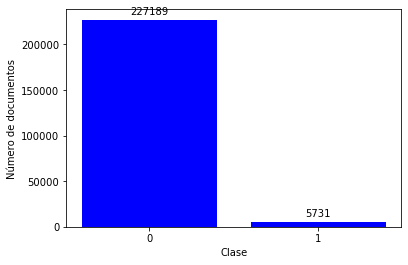

In [98]:
exp_cls.plot_class_distribution()

## Palabras dependientes de la clase incluyendo palabras de paro con p<0.001

In [104]:
ft=FeatureExtraction(all_training[0], w_range=(1,1), stop_wors=None, use_idf=True)

In [109]:
top_words_with_stop=ft.get_chi_2(all_training[1], k=1887, return_scores=True)

In [110]:
print("Numero de palabras")
len(top_words_with_stop)

Numero de palabras


1887

In [111]:
top_words_with_stop[0:100]

,score
therapist,3744.639292
therapy,2521.223169
playlist,1384.425536
kati,1355.273611
vids,1244.263424
...,...
kremlin,100.773707
psyd,98.624069
specializes,98.321380
betterhelp,96.753093


In [112]:
top_words_with_stop[-100:-1]

,score
bufoon,11.074488
lacier,11.071285
dysthymia,11.065371
differentiable,11.064092
biphasic,11.063443
...,...
tre,10.844983
jungkook,10.843518
baekhyun,10.843518
blackpink,10.843518


In [113]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [114]:
#! pip install multidict

In [115]:
import multidict as multidict

In [116]:
def getFrequencyDictForText(table):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for index, row in table.iterrows():
        tmpDict[index] = int(row)
        
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [117]:
def generate_text(table):
    text=[]
    for index, row in table.iterrows():
        text.append((index+" ")*int(row))
    return " ".join(text)
    

In [118]:
gtext=generate_text(top_words_with_stop[0:50])

In [119]:
wc = WordCloud(background_color="white", max_words=50, mask=None, max_font_size=150, width=1200, height=720)

In [120]:
wc.generate_from_frequencies(getFrequencyDictForText(top_words_with_stop))

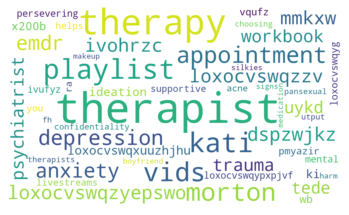

In [121]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [122]:
wc.to_file("D:/chi2_words_depresion.eps")

## Clasificación con CHI2 considerando palabras de paro

In [123]:
from word_level_da.classifier.svm_text import Svm_Text

In [124]:
doc_test=\
data_cls.get_dataset(folder_name="prep_chunks", truth_name="golden_truth.txt", partition="test")

In [125]:
len(doc_test[0])

23545

In [126]:
svm= Svm_Text(all_training[0], all_training[1], True)

In [127]:
svm.extract_features(doc_test[0], feature="word", method="tf-idf", nrange1=(1,1) , nrange2=None, 
     k=len(top_words_with_stop), stop_words=None, norm="l2", idf=True, feature_selection=True, reduce_method="Xi")


# Features:  (232920, 1887)
Training:  (232920, 1887)
Testing:  (23545, 1887)


In [128]:
len(doc_test[3])

2

In [129]:
score= svm.train_and_test(doc_test[1], doc_test[3])

In [130]:
score

[1887,
 0.4714285714285714,
 0.9259259259259259,
 0.4166666666666667,
 0.5747126436781609]

scoreDistribución en la clase positiva

In [69]:
positive_docs=[]
positive_labels=[]

In [70]:
for doc, label  in zip(all_training[0],all_training[1]):
    if label==1:
        positive_docs.append(doc)
        positive_labels.append(label)
        

In [71]:
len(positive_docs)

17544

In [72]:
exp_cls_p=explore_data(positive_docs, positive_labels, "D:/", plot_format="png")

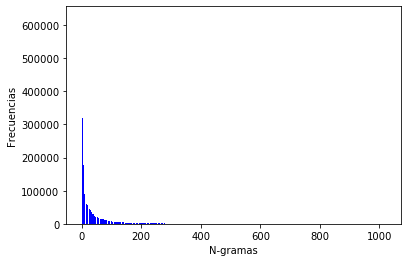

In [77]:
exp_cls.plot_frequency_distribution_of_word_list(
    ngram_range=(1,1), show_labels=False,
    by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia clase positiva

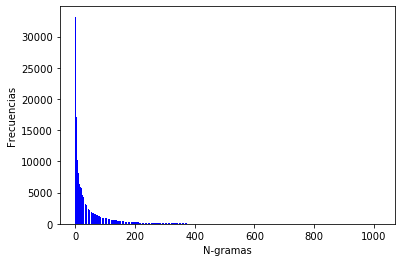

In [78]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=False, word_list=top_words_with_stop.index)

### Frecuencia por documentos

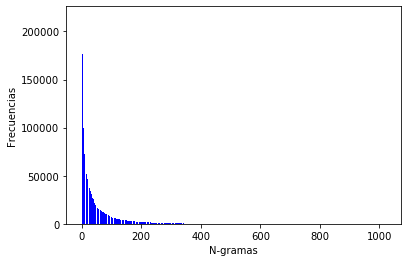

In [79]:
exp_cls.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

### Clase positiva

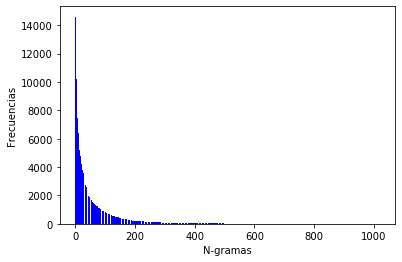

In [80]:
exp_cls_p.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)

In [81]:
negative_docs=[]
negative_labels=[]

In [85]:
for doc, label in zip(all_training[0], all_training[1]):
    if label==0:
        negative_docs.append(doc)
        negative_labels.append(label)
        

In [86]:
len(negative_docs)

227189

In [87]:
exp_cls_n=explore_data(negative_docs, negative_labels, "D:/", plot_format="png")

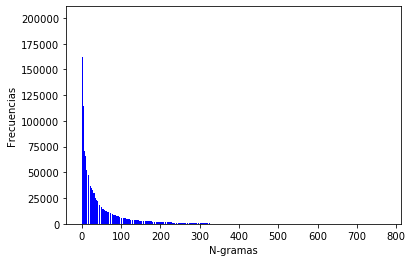

In [88]:
exp_cls_n.plot_frequency_distribution_of_word_list(ngram_range=(1,1), show_labels=False, by_docs=True, word_list=top_words_with_stop.index)